In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk import word_tokenize 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/UglyWords1_annotated.csv', index_col=0)

In [ ]:
df.head()

,string,my_lab
0,*screams in 25 different languages*,0
1,Families to sue over Legionnaires: More than 4...,0
2,Pandemonium In Aba As Woman Delivers Baby With...,0
3,My emotions are a train wreck. My body is a tr...,1
4,Alton brown just did a livestream and he burne...,0


In [ ]:
def clean(text):
  text = re.sub('[^A-Za-z]+', ' ', text)
  return text

In [ ]:
df['Cleaned_string'] = df['string'].apply(clean)
df.head()

,string,my_lab,Cleaned_string
0,*screams in 25 different languages*,0,screams in different languages
1,Families to sue over Legionnaires: More than 4...,0,Families to sue over Legionnaires More than fa...
2,Pandemonium In Aba As Woman Delivers Baby With...,0,Pandemonium In Aba As Woman Delivers Baby With...
3,My emotions are a train wreck. My body is a tr...,1,My emotions are a train wreck My body is a tra...
4,Alton brown just did a livestream and he burne...,0,Alton brown just did a livestream and he burne...


In [ ]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist  

df['POS_tag'] = df['Cleaned_string'].apply(token_stop_pos)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df.head()

,string,my_lab,Cleaned_string,POS_tag
0,*screams in 25 different languages*,0,screams in different languages,"[(screams, n), (different, a), (languages, n)]"
1,Families to sue over Legionnaires: More than 4...,0,Families to sue over Legionnaires More than fa...,"[(Families, n), (sue, v), (Legionnaires, n), (..."
2,Pandemonium In Aba As Woman Delivers Baby With...,0,Pandemonium In Aba As Woman Delivers Baby With...,"[(Pandemonium, n), (Aba, n), (Woman, n), (Deli..."
3,My emotions are a train wreck. My body is a tr...,1,My emotions are a train wreck My body is a tra...,"[(emotions, n), (train, n), (wreck, n), (body,..."
4,Alton brown just did a livestream and he burne...,0,Alton brown just did a livestream and he burne...,"[(Alton, n), (brown, n), (livestream, n), (bur..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
          lemma = word
          lemma_rew = lemma_rew + " " + lemma
      else:
          lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
          lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS_tag'].apply(lemmatize)
df.head()

,string,my_lab,Cleaned_string,POS_tag,Lemma
0,*screams in 25 different languages*,0,screams in different languages,"[(screams, n), (different, a), (languages, n)]",scream different language
1,Families to sue over Legionnaires: More than 4...,0,Families to sue over Legionnaires More than fa...,"[(Families, n), (sue, v), (Legionnaires, n), (...",Families sue Legionnaires family affect fata...
2,Pandemonium In Aba As Woman Delivers Baby With...,0,Pandemonium In Aba As Woman Delivers Baby With...,"[(Pandemonium, n), (Aba, n), (Woman, n), (Deli...",Pandemonium Aba Woman Delivers Baby Without ...
3,My emotions are a train wreck. My body is a tr...,1,My emotions are a train wreck My body is a tra...,"[(emotions, n), (train, n), (wreck, n), (body,...",emotion train wreck body train wreck wreck
4,Alton brown just did a livestream and he burne...,0,Alton brown just did a livestream and he burne...,"[(Alton, n), (brown, n), (livestream, n), (bur...",Alton brown livestream burn butter touch hot...


In [ ]:
df = df[['string', 'Lemma', 'my_lab']]
df.head()

,string,Lemma,my_lab
0,*screams in 25 different languages*,scream different language,0
1,Families to sue over Legionnaires: More than 4...,Families sue Legionnaires family affect fata...,0
2,Pandemonium In Aba As Woman Delivers Baby With...,Pandemonium Aba Woman Delivers Baby Without ...,0
3,My emotions are a train wreck. My body is a tr...,emotion train wreck body train wreck wreck,1
4,Alton brown just did a livestream and he burne...,Alton brown livestream burn butter touch hot...,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Lemma'], df['my_lab'], test_size=0.30, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
import tensorflow as tf 
import tensorflow_hub as hub
from tensorflow import keras 

import os
import re
import seaborn as sns

from numpy.linalg import norm

In [ ]:
model_url = 'https://tfhub.dev/google/universal-sentence-encoder/4'
model = hub.load(model_url)

In [ ]:
def embed(input):
  return model(input)

In [ ]:
X_train = embed(X_train)
X_test = embed(X_test)
X_val = embed(X_val)

In [ ]:
X_test = tf.convert_to_tensor(X_test)
X_train = tf.convert_to_tensor(X_train)
X_val = tf.convert_to_tensor(X_val)

In [ ]:
X_test

<tf.Tensor: shape=(560, 512), dtype=float32, numpy=
array([[-0.00955066, -0.03651809, -0.04447678, ...,  0.01462803,
        -0.04431895, -0.05483839],
       [-0.02202889, -0.03273502,  0.05625296, ...,  0.01454953,
        -0.00566854,  0.0611241 ],
       [ 0.03885471, -0.00565137, -0.02431832, ..., -0.02431631,
        -0.02436279,  0.01085107],
       ...,
       [ 0.06541236, -0.06881852, -0.06445166, ...,  0.04643673,
         0.01995998, -0.02610081],
       [ 0.00482545,  0.06307967,  0.0106769 , ..., -0.06134504,
        -0.0114053 , -0.00507065],
       [ 0.0165326 ,  0.00059229,  0.06476858, ..., -0.03855505,
         0.02572986, -0.05692178]], dtype=float32)>

Epoch 1/23
16/16 [==============================] - 1s 12ms/step - loss: 0.6841 - accuracy: 0.8016 - val_loss: 0.6700 - val_accuracy: 0.8232
Epoch 2/23
16/16 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.8016 - val_loss: 0.6387 - val_accuracy: 0.8232
Epoch 3/23
16/16 [==============================] - 0s 4ms/step - loss: 0.6286 - accuracy: 0.8016 - val_loss: 0.6062 - val_accuracy: 0.8232
Epoch 4/23
16/16 [==============================] - 0s 3ms/step - loss: 0.5996 - accuracy: 0.8016 - val_loss: 0.5747 - val_accuracy: 0.8232
Epoch 5/23
16/16 [==============================] - 0s 4ms/step - loss: 0.5722 - accuracy: 0.8016 - val_loss: 0.5464 - val_accuracy: 0.8232
Epoch 6/23
16/16 [==============================] - 0s 3ms/step - loss: 0.5486 - accuracy: 0.8016 - val_loss: 0.5230 - val_accuracy: 0.8232
Epoch 7/23
16/16 [==============================] - 0s 4ms/step - loss: 0.5288 - accuracy: 0.8016 - val_loss: 0.5024 - val_accuracy: 0.8232
Epoch 8/23
16/16 [=

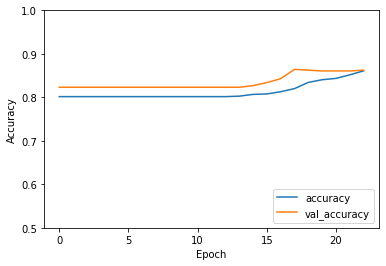

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))

model.add(keras.layers.Dense(1))

model.compile(optimizer='Nadam', loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=23, batch_size=64,
                    validation_data=(X_test, y_test))
# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)



In [ ]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


18/18 - 0s - loss: 0.3454 - accuracy: 0.8625
0.862500011920929


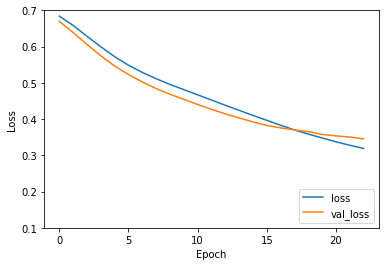

In [ ]:
# Validation
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.1, 0.7])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

In [ ]:
t = [['someone has an emergency']]
#t = tf.convert_to_tensor(t)


In [ ]:
t = tf.convert_to_tensor(t)

In [ ]:
from tensorflow.keras.models import Sequential, save_model, load_model

In [ ]:
filepath = '/content/model'
save_model(model, filepath)

INFO:tensorflow:Assets written to: /content/model/assets


INFO:tensorflow:Assets written to: /content/model/assets


In [ ]:
# Load the model
model = load_model('/content/model.h5', compile = True)

In [ ]:
def prepare_input(text):
    x = np.zeros((1, SEQUENCE_LENGTH, len(chars)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/4")

embeddings = embed([ 
"The quick brown fox jumps over the lazy dog.", 
"I am a sentence for which I would like to get its embedding"])

print(embeddings)

{'outputs': <tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[ 0.01305106,  0.02235123, -0.03263276, ..., -0.00565093,
        -0.04793027, -0.11492757],
       [ 0.05833394, -0.0818501 ,  0.06890938, ..., -0.00923878,
        -0.08695354, -0.01415738]], dtype=float32)>}


In [ ]:
predictions = model.predict(embeddings)
print(predictions)

[[-1.3677709 ]
 [-0.48962834]]
